Estimadores de densidad
==
No entra estrictamente dentro del ML, pero es una herramienta útil en el campo de la estadística, pq nos permite inferir alguna distribución de la probabilidad en función del muestreo de datos de un problema dado.

El campo del ML es un campo hermano de la estadística.
___
Imaginemos que tenemos una distribución de probabilidad (curva verde) de alguna variable dada.
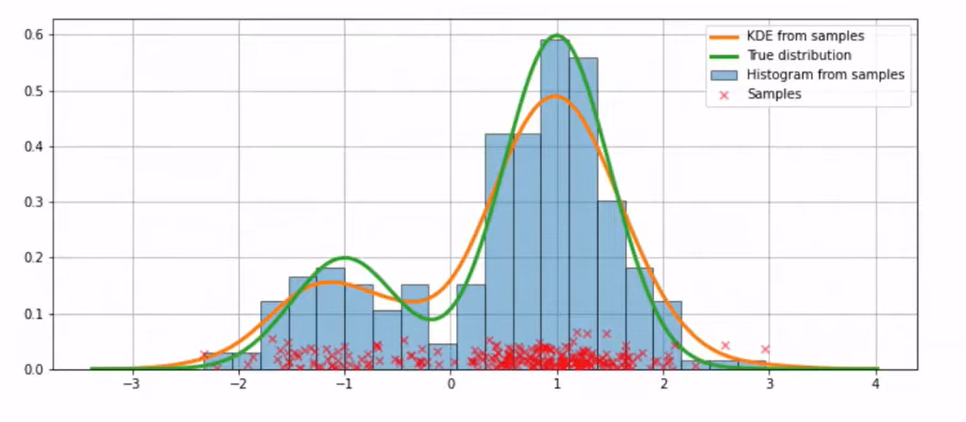
A priori, no la conocemos. No conocemos la distribución de algunos de los features. Lo que conocemos es el **muestreo**, lo que vemos graficados en el eje $x$ como la cruz roja. Esos valores se agrupan alrededor de diferentes zonas. 

Una de las técnicas para visualizar la distribución de los datos es el **histograma**. Consiste en dividir la escala de variación del problema en diferentes intervalos (o bins), que tienen una longitud definida, y contamos cuántos ejemplos (cruces rojas) caen dentro de los intervalos en particular.

El rtado de ese muestreo es el histograma celeste. Es un conteo de cuantos ejemplos caen en ese intervalo. Se han normalizado los valores del histograma.

En este caso, el número de intervalos es = 20. Lo que queremos es inferir cuál es la distribución de probabilidad real. 

La herramienta de distribución de densidad mediante las funciones kernell lo que hacen es:
- obtener una estimación de la densidad de probabilidad más acertada de la que podriamos obtener solo con el histograma.
- que esa densidad de probabilidad no dependa tan fuertemente de un parámetro (como puede ser el número de intervalos del histograma)

Esta herramienta consiste en pararse en un ej particular, y en función de un parámetro seteable, **el ancho de banda**, aplicar una fucnión sobre la diferencia del valor de ese feature (el valor del punto), respecto de los valores de los otros ejemplos.

Se obtiene un valor como el de la curva naranja, el cual se aproxima de manera mucho más suave a la distribución de probabilidad verdadera. 

### KDE: kernell density estimator. 
No se especifica qué tipo de función estamos empleando. Nosotros usamos la **función gaussiana**.

C:\Users\vguar\AppData\Local\Temp\ipykernel_4880\2768968247.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) >= '2.1':


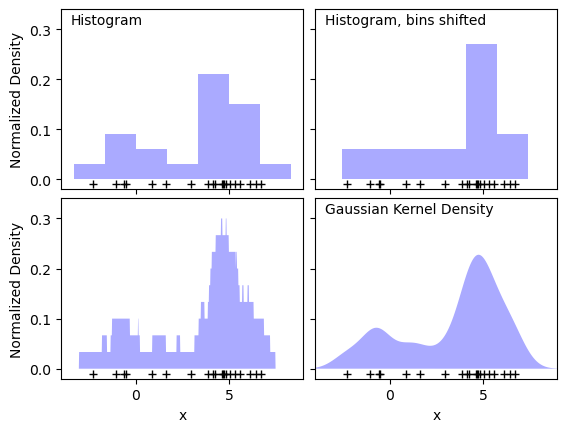

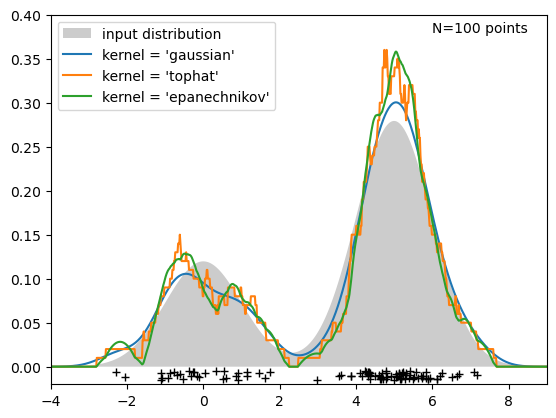

In [1]:
# es una alternativa a los histogramas normales

# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),  np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
#ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")
   
# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')
 
 
#----------------------------------------------------------------------

 
#----------------------------------------------------------------------
# Plot a 1D density example
 
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])  + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel = kernel, bandwidth = 0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)

plt.show()

# aplicando los diferentes kernells vemos que obtenemos diferentes resultados

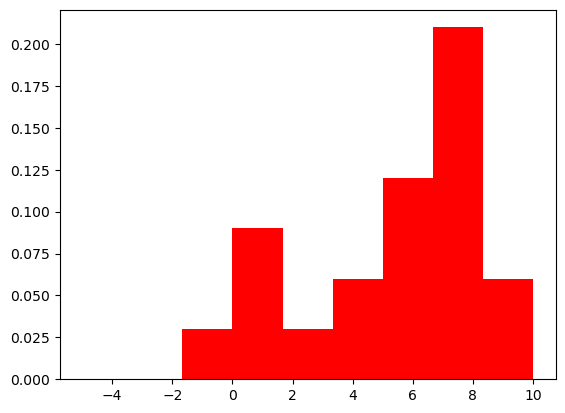

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

# seteamos una semilla aleatoria, obtenemos siempre el mismo rtado
np.random.seed(1)

# Construimos una serie de datos usando una distribución normal
# np.random.normal(valor_medio, desviación_standard, )
X = np.concatenate((np.random.normal(2, 1, 6),  np.random.normal(7, 1, 14)))
X =X[:, np.newaxis] #Convierto los datos del array en un vector columna

# las representamos en un plot de histograma
numero_intervalos = np.linspace(-5, 10, 10)  #Número de intervalos
plt.hist(X[:, 0], numero_intervalos, facecolor = 'red', **{'density': True})

# si en la función histograma de matplotlib varío el número de intervalos,
# obtengo una distribución bastante diferente a la anterior.
 
plt.show()

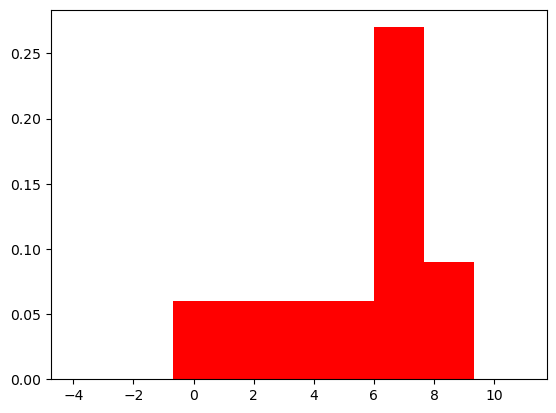

In [3]:
# si varío el número de intervalos, obtengo una visualización muy distinta a la anterior
# en cuanto a la visualización de los datos, el histgrama es una herramienta útil, pero 
# dependiente del nro de bins/ casilleros con los que cuento

# esto es así porque estoy trabajando relativamente con pocos datos
plt.hist(X[:, 0], numero_intervalos + 1, facecolor = 'red', **{'density': True})
plt.show()

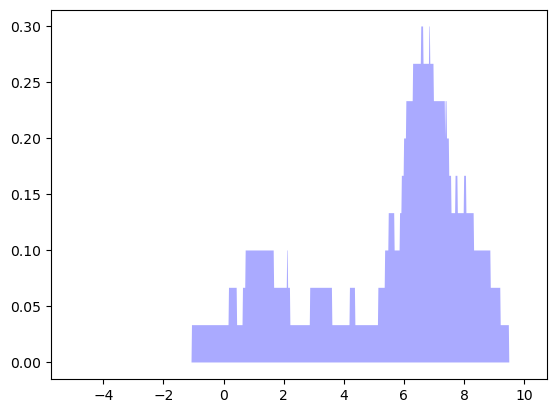

In [4]:
# aca tenemos graficados cuales son los resultados individuales de cada
# uno de esos datos
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
plt.fill(X_plot[:, 0], np.exp(log_dens), fc = '#AAAAFF')
plt.show()

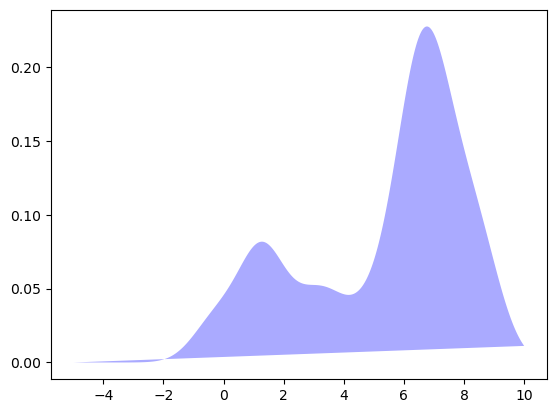

In [5]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.75).fit(X)
log_dens = kde.score_samples(X_plot)
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
plt.fill(X_plot[:, 0], np.exp(log_dens), fc = '#AAAAFF')

plt.show()

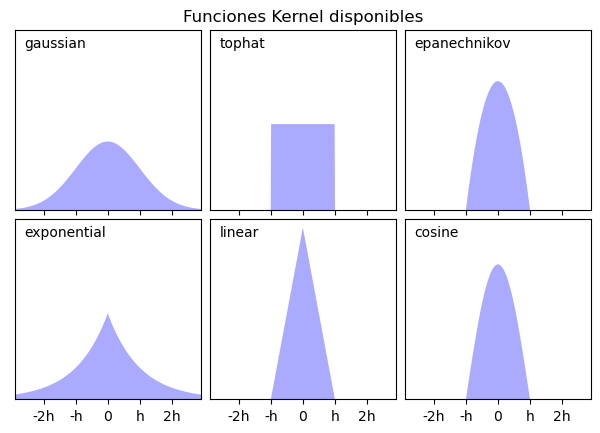

In [6]:
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel = kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Funciones Kernel disponibles')
plt.show()

# el más utilizado es el gaussiano. Cuál usar? depende de nuestro
# problema a resolver.